In [1]:
import pandas_ta as ta 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf


In [4]:
#Upload data
btc= pd.read_csv("C:/Users/Djo/Documents/GitHub/Analyse-comparative-des-actifs-financiers/ath/btc.csv")
sp500=pd.read_csv("C:/Users/Djo/Documents/GitHub/Analyse-comparative-des-actifs-financiers/ath/sp500/csv")
gold=pd.read_csv("C:/Users/Djo/Documents/GitHub/Analyse-comparative-des-actifs-financiers/ath/gold.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Djo/Documents/GitHub/Analyse-comparative-des-actifs-financiers/ath/sp500/csv'

In [58]:

# Fonction pour calculer le RSI
def calculate_rsi(df, periods=14):
    delta = df['Close'].diff()  # Calcul des différences journalières des prix de clôture

    gain = delta.where(delta > 0, 0)  # Gains
    # Conserve les gains (valeurs positives) et remplace les pertes par 0.

    loss = -delta.where(delta < 0, 0)  # Pertes
    # Conserve les pertes (valeurs négatives) en les transformant en valeurs positives et remplace les gains par 0

    avg_gain = gain.rolling(window=periods, min_periods=periods).mean()  # Moyenne des gains
    # Calcule la moyenne mobile des gains sur la période spécifiée.

    avg_loss = loss.rolling(window=periods, min_periods=periods).mean()  # Moyenne des pertes
    # Calcule la moyenne mobile des pertes sur la période spécifiée

    rs = avg_gain / avg_loss  # Calcul de la force relative (RS)
    rsi = 100 - (100 / (1 + rs))  # Calcul du RSI

    return rsi



# Indicateurs Techniques en Analyse Financière

## 1. Moyenne Mobile Simple (SMA)

### Définition
La **Moyenne Mobile Simple (SMA)** est un indicateur qui lisse les prix en calculant la moyenne arithmétique des prix de clôture sur une période donnée. Elle permet d'identifier la tendance générale du marché.

### Formule
$$ SMA_t = \frac{P_1 + P_2 + ... + P_n}{n} $$
Où :
- $( P_i )$ est le prix de clôture à la période $( i )$
- $( n )$ est la période choisie


In [59]:
def calculate_sma(df, column='Close', window=3):
    return df[column].rolling(window=window).mean()


## 2. Moyenne Mobile Exponentielle (EMA)

### Définition
La **Moyenne Mobile Exponentielle (EMA)** est similaire à la SMA, mais elle accorde plus de poids aux valeurs récentes, ce qui la rend plus réactive aux changements de prix.

### Formule
$$
EMA_t = \alpha P_t + (1 - \alpha) EMA_{t-1}
$$
Avec $$ ( \alpha = \frac{2}{n+1} ) $$

In [60]:
def calculate_ema(df, column='Close', window=3):
    return df[column].ewm(span=window, adjust=False,ignore_na=False,axis=0,min_periods=0).mean()

## 3. Indicateur de Force Relative (RSI)

### Définition
Le **Relative Strength Index (RSI)** est un indicateur qui mesure la force et la vitesse des variations de prix. Il permet d'identifier les conditions de surachat (RSI > 70) et de survente (RSI < 30).

### Formule
$$ RSI = 100 - \frac{100}{1 + RS} $$
Avec $( RS = \frac{Moyenne\ des\ gains}{Moyenne\ des\ pertes} )$

In [61]:
def calculate_rsi(df, column='Close', window=14):
    delta = df[column].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

## 4. MACD (Moving Average Convergence Divergence)

### Définition
Le **MACD** est un indicateur basé sur deux moyennes mobiles exponentielles pour identifier les tendances et les changements de momentum.

### Formule
$ MACD = EMA_{12} - EMA_{26} $

$ Signal = EMA_9(MACD) $


In [62]:
def calculate_macd(df, column='Close', short_window=12, long_window=26, signal_window=9):
    short_ema = df[column].ewm(span=short_window, adjust=False).mean()
    long_ema = df[column].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    
    return macd, signal

## 5. Les Bandes de Bollinger

### Définition
Les **Bandes de Bollinger** permettent d'analyser la volatilité du marché en traçant une bande supérieure et une bande inférieure autour d'une moyenne mobile.

### Formule
- $ Bande\ Supérieure = SMA + (k \times \sigma) $

- $ Bande\ Inférieure = SMA - (k \times \sigma) $

Où :
- $( \sigma)$ est l'écart-type 
- $(k)$ est généralement égal à 2.

In [63]:
def calculate_bollinger_bands(df, column='Close', window=20, num_std=2):
    sma = df[column].rolling(window=window).mean()
    std = df[column].rolling(window=window).std()
    upper_band = sma + (num_std * std)
    lower_band = sma - (num_std * std)
    
    return upper_band, lower_band

## 6. TCAT 

In [72]:
def calculer_tcac(valeur_initiale, valeur_finale, annees):
    """
    Calcule le taux de croissance annuel composé (TCAC).
    
    :param valeur_initiale: Valeur de départ
    :param valeur_finale: Valeur finale
    :param annees: Nombre d'années
    :return: TCAC en pourcentage
    """
    return ((valeur_finale / valeur_initiale) ** (1 / annees) - 1) * 100

# Exemples de valeurs pour différents actifs
actifs = {
    "Bitcoin": {"valeur_initiale": 7200, "valeur_finale": 42000, "annees": 5},
    "S&P 500": {"valeur_initiale": 3200, "valeur_finale": 5100, "annees": 5},  # Exemple de valeurs
    "Or": {"valeur_initiale": 1500, "valeur_finale": 2000, "annees": 5}  # Exemple de valeurs
}

# Calcul et affichage des TCAC
for actif, donnees in actifs.items():
    tcac = calculer_tcac(donnees["valeur_initiale"], donnees["valeur_finale"], donnees["annees"])
    print(f"TCAC de {actif} sur {donnees['annees']} ans: {tcac:.2f} %")


TCAC de Bitcoin sur 5 ans: 42.29 %
TCAC de S&P 500 sur 5 ans: 9.77 %
TCAC de Or sur 5 ans: 5.92 %


## 7. Maximum Drawdown
### Définition de la MDD (Maximum Drawdown)

La **MDD (Maximum Drawdown)** est une mesure utilisée pour évaluer la perte maximale d'un investissement par rapport à son pic historique avant une récupération complète. Elle est exprimée en pourcentage et représente la plus grande baisse observée entre un sommet et un creux avant un nouveau sommet.

### Étapes pour calculer la MDD

1. **Trouver le pic maximal (P)** du prix au cours de la période.
2. **Identifier la valeur minimale suivante (L)** avant un nouveau pic.
3. **Calculer la baisse maximale (MDD)** avec la formule :
   $$
   MDD = \frac{L - P}{P} \times 100
   $$

### Exemple de calcul

- $( P )$ est le prix maximal au cours de la période.
- $( L )$ est la valeur minimale suivante avant un nouveau pic.

MDD Gold: -1.79%
MDD S&P 500: -5.16%
MDD Bitcoin: -4.80%


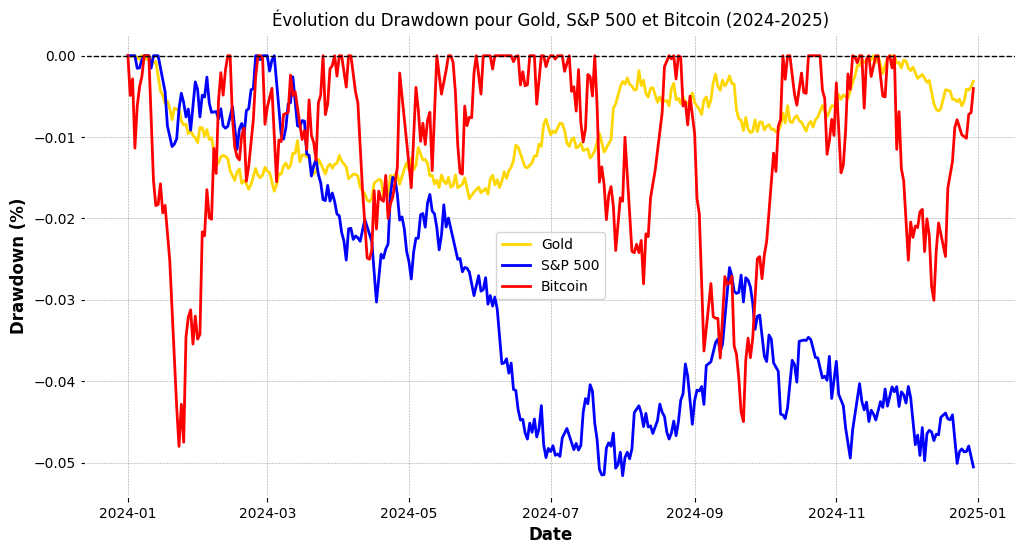

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simuler des données de prix pour Gold, S&P 500 et Bitcoin (remplacez par vos données réelles)
dates = pd.date_range(start="2024-01-01", periods=365, freq='D')
np.random.seed(42)

# Générer des tendances de prix aléatoires
gold_prices = np.cumsum(np.random.normal(0, 2, len(dates))) + 2000
sp500_prices = np.cumsum(np.random.normal(0, 10, len(dates))) + 5000
btc_prices = np.cumsum(np.random.normal(0, 200, len(dates))) + 40000

# Fonction pour calculer la Maximum Drawdown (MDD)
def calculate_mdd(prices):
    peak = prices.cummax()  # Trouver les pics successifs
    drawdown = (prices - peak) / peak  # Calculer les baisses depuis les pics
    mdd = drawdown.min() * 100  # Trouver la baisse maximale
    return mdd, drawdown

# Calculer la MDD pour chaque actif
mdd_gold, drawdown_gold = calculate_mdd(pd.Series(gold_prices, index=dates))
mdd_sp500, drawdown_sp500 = calculate_mdd(pd.Series(sp500_prices, index=dates))
mdd_btc, drawdown_btc = calculate_mdd(pd.Series(btc_prices, index=dates))

# Affichage des résultats
print(f"MDD Gold: {mdd_gold:.2f}%")
print(f"MDD S&P 500: {mdd_sp500:.2f}%")
print(f"MDD Bitcoin: {mdd_btc:.2f}%")

# 📊 Tracer les drawdowns pour visualiser les baisses maximales
plt.figure(figsize=(12, 6))
plt.plot(dates, drawdown_gold, label="Gold", color="gold")
plt.plot(dates, drawdown_sp500, label="S&P 500", color="blue")
plt.plot(dates, drawdown_btc, label="Bitcoin", color="red")

plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.legend()
plt.title("Évolution du Drawdown pour Gold, S&P 500 et Bitcoin (2024-2025)")
plt.xlabel("Date")
plt.ylabel("Drawdown (%)")
plt.show()


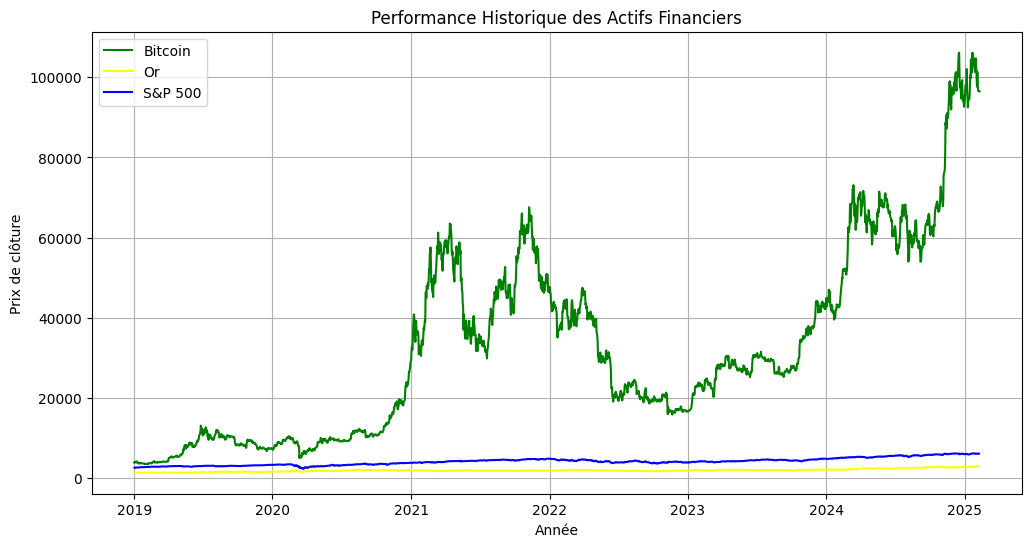

In [64]:
# Charger les données (exemple : fichiers CSV)
btc = pd.read_csv("C:/Users/Djo/Documents/GitHub/Analyse-comparative-des-actifs-financiers/bitcoin_historical_data_cleaned.csv", parse_dates=["Date"], index_col="Date")
gold = pd.read_csv("C:/Users/Djo/Documents/GitHub/Analyse-comparative-des-actifs-financiers/gold_historical_data_cleaned.csv", parse_dates=["Date"], index_col="Date")
sp500 = pd.read_csv("C:/Users/Djo/Documents/GitHub/Analyse-comparative-des-actifs-financiers/sp500_historical_data_cleaned.csv", parse_dates=["Date"], index_col="Date")

# Tracer la performance historique
plt.figure(figsize=(12, 6))
plt.plot(btc.index, btc["Close"], label="Bitcoin", color="green")
plt.plot(gold.index, gold["Close"], label="Or", color="yellow")
plt.plot(sp500.index, sp500["Close"], label="S&P 500", color="blue")

# Personnalisation du graphique
plt.xlabel("Année")
plt.ylabel("Prix de clôture")
plt.title("Performance Historique des Actifs Financiers")
plt.legend()
plt.grid(True)
plt.show()


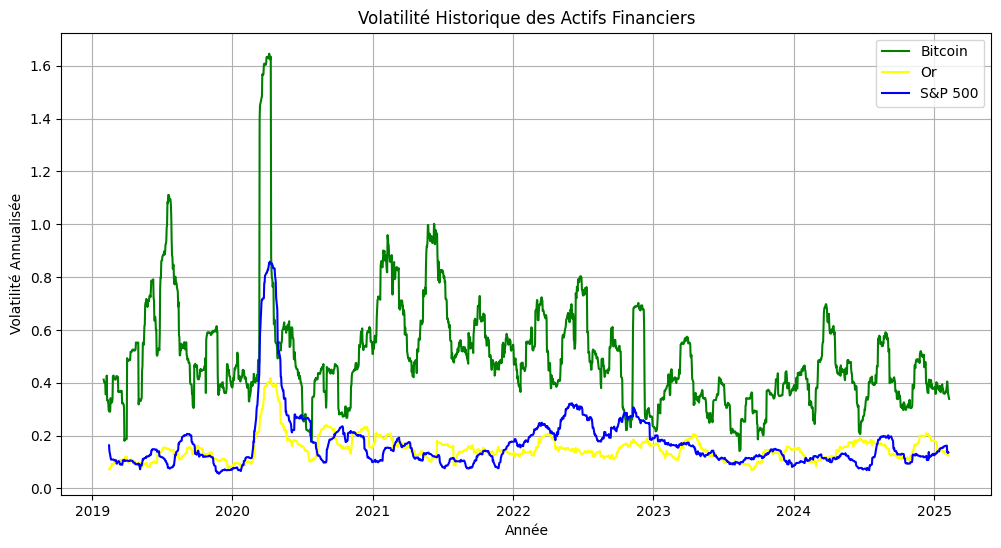

In [65]:
# Calcul des rendements log
btc["Log_Returns"] = np.log(btc["Close"] / btc["Close"].shift(1))
gold["Log_Returns"] = np.log(gold["Close"] / gold["Close"].shift(1))
sp500["Log_Returns"] = np.log(sp500["Close"] / sp500["Close"].shift(1))

# Calcul de la volatilité mobile (roulante sur 30 jours)
btc["Volatility"] = btc["Log_Returns"].rolling(window=30).std() * np.sqrt(252)
gold["Volatility"] = gold["Log_Returns"].rolling(window=30).std() * np.sqrt(252)
sp500["Volatility"] = sp500["Log_Returns"].rolling(window=30).std() * np.sqrt(252)

# Tracer la volatilité historique
plt.figure(figsize=(12, 6))
plt.plot(btc.index, btc["Volatility"], label="Bitcoin", color="green")
plt.plot(gold.index, gold["Volatility"], label="Or", color="yellow")
plt.plot(sp500.index, sp500["Volatility"], label="S&P 500", color="blue")

# Personnalisation du graphique
plt.xlabel("Année")
plt.ylabel("Volatilité Annualisée")
plt.title("Volatilité Historique des Actifs Financiers")
plt.legend()
plt.grid(True)
plt.show()


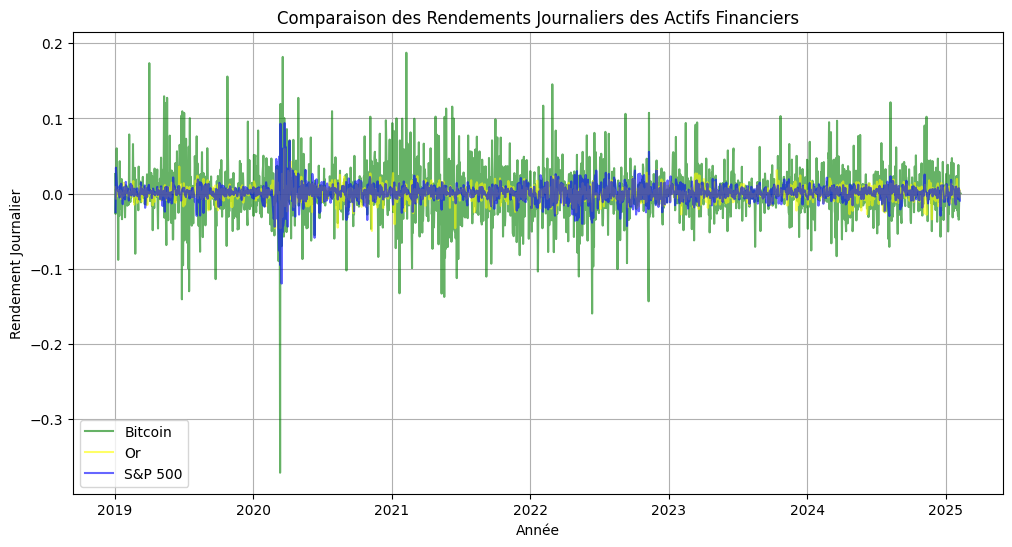

In [66]:
# Calcul des rendements quotidiens
btc["Daily_Return"] = btc["Close"].pct_change()
gold["Daily_Return"] = gold["Close"].pct_change()
sp500["Daily_Return"] = sp500["Close"].pct_change()

# Tracer les rendements journaliers des trois actifs
plt.figure(figsize=(12, 6))
plt.plot(btc.index, btc["Daily_Return"], label="Bitcoin", color="green", alpha=0.6)
plt.plot(gold.index, gold["Daily_Return"], label="Or", color="yellow", alpha=0.6)
plt.plot(sp500.index, sp500["Daily_Return"], label="S&P 500", color="blue", alpha=0.6)

# Personnalisation du graphique
plt.xlabel("Année")
plt.ylabel("Rendement Journalier")
plt.title("Comparaison des Rendements Journaliers des Actifs Financiers")
plt.legend()
plt.grid(True)
plt.show()


In [67]:
# Appliquer les indicateurs aux 3 actifs
for df in [btc, gold, sp500]:
    df["SMA_3"] = calculate_sma(df)
    df["EMA_3"] = calculate_ema(df)
    df["RSI_14"] = calculate_rsi(df)
    df["MACD"], df["Signal_MACD"] = calculate_macd(df)
    df["Upper_BB"], df["Lower_BB"] = calculate_bollinger_bands(df)

# Sauvegarder les nouveaux fichiers CSV
btc.to_csv("bitcoin_with_indicators.csv")
gold.to_csv("gold_with_indicators.csv")
sp500.to_csv("sp500_with_indicators.csv")

print("Les indicateurs ont été calculés et enregistrés avec succès !")

C:\Users\Djo\AppData\Local\Temp\ipykernel_17380\1771973601.py:2: FutureWarning: The 'axis' keyword in Series.ewm is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  return df[column].ewm(span=window, adjust=False,ignore_na=False,axis=0,min_periods=0).mean()
C:\Users\Djo\AppData\Local\Temp\ipykernel_17380\1771973601.py:2: FutureWarning: The 'axis' keyword in Series.ewm is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  return df[column].ewm(span=window, adjust=False,ignore_na=False,axis=0,min_periods=0).mean()
C:\Users\Djo\AppData\Local\Temp\ipykernel_17380\1771973601.py:2: FutureWarning: The 'axis' keyword in Series.ewm is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  return df[column].ewm(span=window, adjust=False,ignore_na=False,axis=0,min_periods=0).mean()


Les indicateurs ont été calculés et enregistrés avec succès !


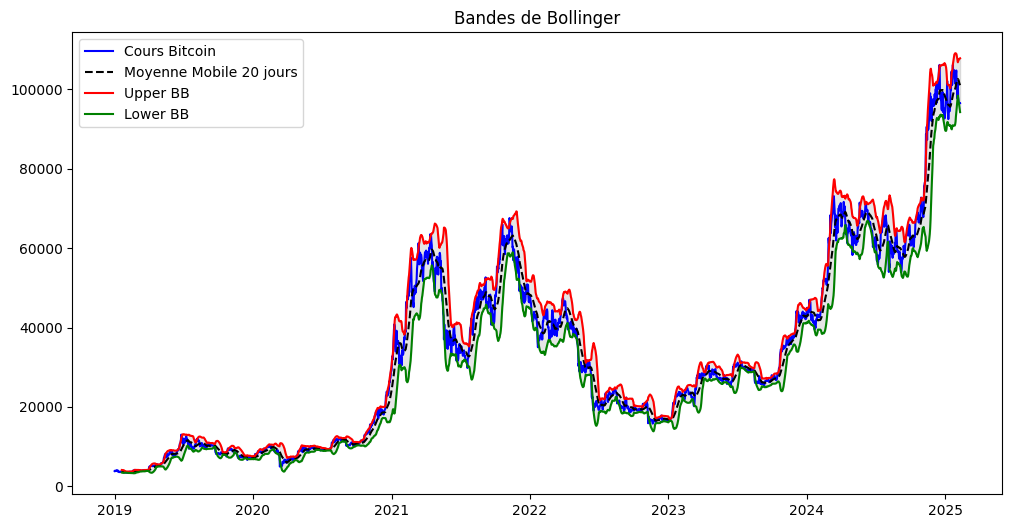

In [68]:
btc['SMA_20']=calculate_sma(btc,column='Close', window=20)
plt.figure(figsize=(12,6))
plt.plot(btc['Close'], label='Cours Bitcoin', color='blue')
plt.plot(btc['SMA_20'], label='Moyenne Mobile 20 jours', linestyle='dashed', color='black')
plt.plot(btc['Upper_BB'], label='Upper BB', color='red')
plt.plot(btc['Lower_BB'], label='Lower BB', color='green')
plt.fill_between(btc.index, btc['Upper_BB'], btc['Lower_BB'], color='gray', alpha=0.2)
plt.legend()
plt.title('Bandes de Bollinger')
plt.show()

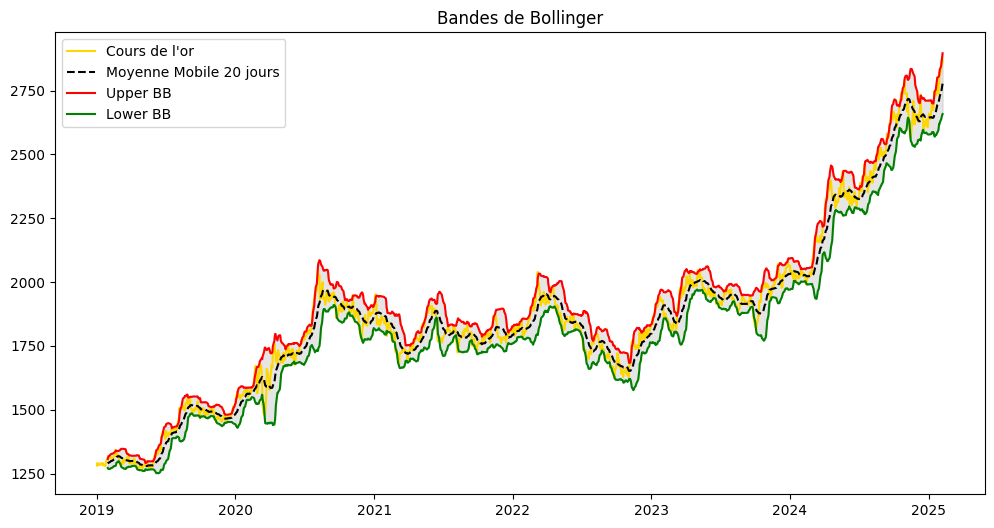

In [69]:
gold['SMA_20']=calculate_sma(gold,column='Close', window=20)
plt.figure(figsize=(12,6))
plt.plot(gold['Close'], label='Cours de l\'or', color='gold')
plt.plot(gold['SMA_20'], label='Moyenne Mobile 20 jours', linestyle='dashed', color='black')
plt.plot(gold['Upper_BB'], label='Upper BB', color='red')
plt.plot(gold['Lower_BB'], label='Lower BB', color='green')
plt.fill_between(gold.index, gold['Upper_BB'], gold['Lower_BB'], color='gray', alpha=0.2)
plt.legend()
plt.title('Bandes de Bollinger')
plt.show()

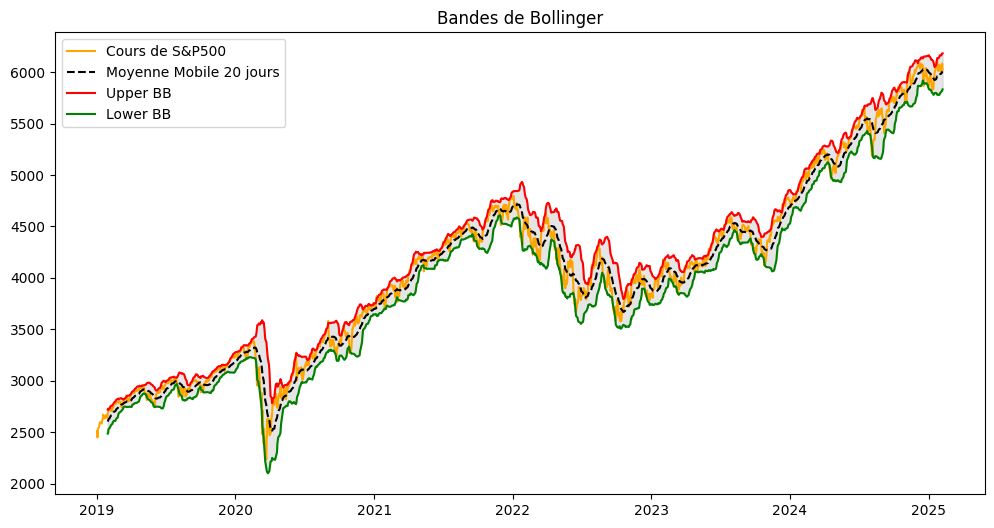

In [70]:
sp500['SMA_20']=calculate_sma(sp500,column='Close', window=20)
plt.figure(figsize=(12,6))
plt.plot(sp500['Close'], label='Cours de S&P500', color='orange')
plt.plot(sp500['SMA_20'], label='Moyenne Mobile 20 jours', linestyle='dashed', color='black')
plt.plot(sp500['Upper_BB'], label='Upper BB', color='red')
plt.plot(sp500['Lower_BB'], label='Lower BB', color='green')
plt.fill_between(sp500.index, sp500['Upper_BB'], sp500['Lower_BB'], color='gray', alpha=0.2)
plt.legend()
plt.title('Bandes de Bollinger')
plt.show()

c:\Users\Djo\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


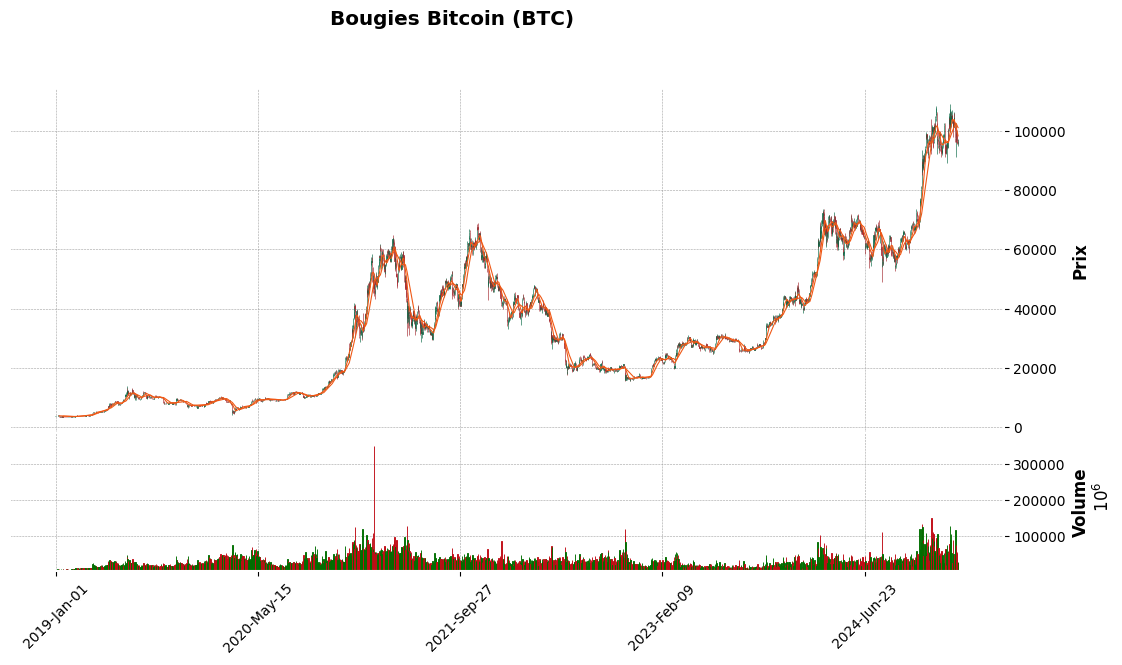

c:\Users\Djo\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


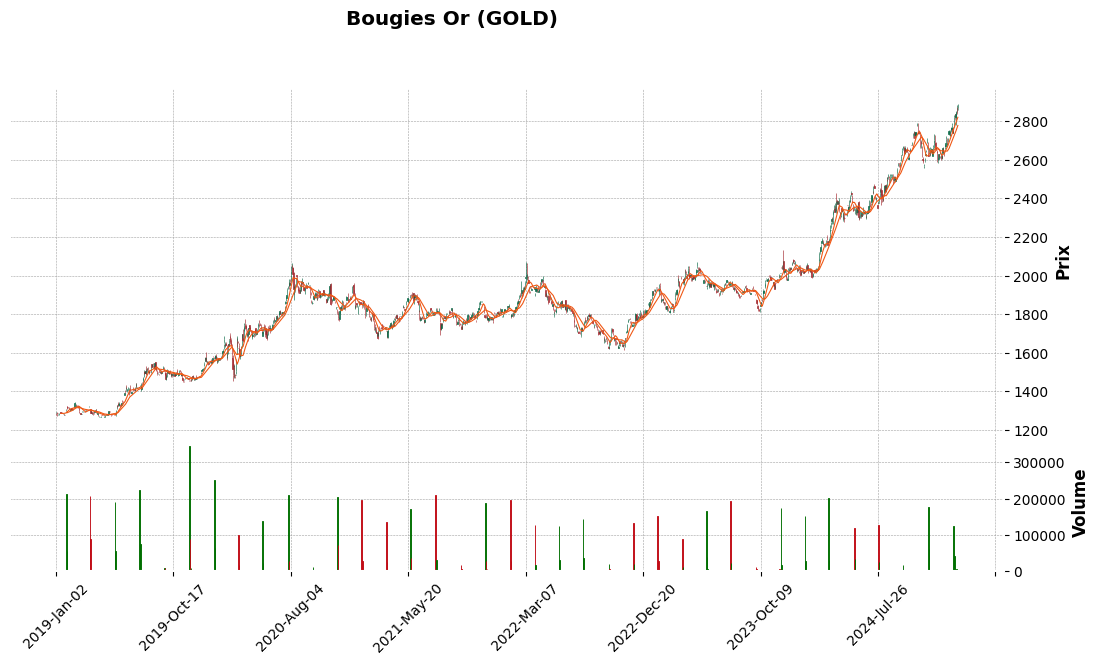

c:\Users\Djo\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


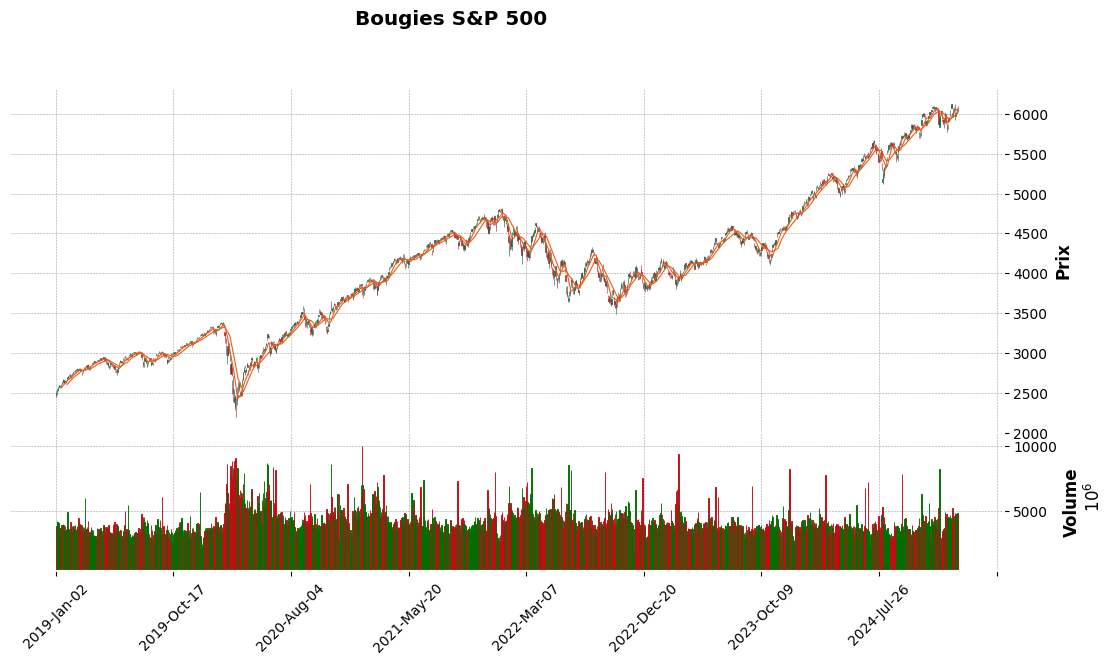

In [71]:
# Définition de la fonction pour afficher les bougies japonaises
def plot_candlestick_chart(df, title="Graphique en bougies", asset="Actif"):
    """Affiche le graphique en bougies japonaises pour un actif."""
    # Vérifier si les colonnes nécessaires existent
    required_columns = ["Open", "High", "Low", "Close"]
    if not all(col in df.columns for col in required_columns):
        print(f"Erreur : Les colonnes {required_columns} sont manquantes dans les données de {asset}.")
        return

    # Paramètres des couleurs
    color_up = 'green'   # Bougie verte (Hausse)
    color_down = 'red'   # Bougie rouge (Baisse)

    # Tracer les bougies
    mpf.plot(df, type='candle', style='charles', title=title, 
             ylabel="Prix", ylabel_lower="Volume", 
             mav=(10, 20),  # Moyennes mobiles 10 et 20 jours
             volume=True,  # Afficher le volume
             figratio=(12,6), 
             figscale=1.2)

# Afficher les graphiques pour chaque actif
plot_candlestick_chart(btc, title="Bougies Bitcoin (BTC)", asset="Bitcoin")
plot_candlestick_chart(gold, title="Bougies Or (GOLD)", asset="Or")
plot_candlestick_chart(sp500, title="Bougies S&P 500", asset="S&P 500")
